In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pokedf = pd.read_csv('/content/drive/MyDrive/PokemonData.csv')
pokedf

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Electric,Dragon,125,73,91,137,89,75
1021,1022,Iron Boulder,Rock,Psychic,90,120,80,68,108,124
1022,1023,Iron Crown,Steel,Psychic,90,72,100,122,108,98
1023,1024,Terapagos,Normal,NaN,90,65,85,65,85,60


# Data Ingestion

In [4]:
len(pokedf)

1025

In [5]:
pokedf.shape

(1025, 10)

In [6]:
pokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      1025 non-null   int64 
 1   Name        1025 non-null   object
 2   Type 1      1025 non-null   object
 3   Type 2      526 non-null    object
 4   HP          1025 non-null   int64 
 5   Attack      1025 non-null   int64 
 6   Defense     1025 non-null   int64 
 7   Sp.Attack   1025 non-null   int64 
 8   Sp.Defense  1025 non-null   int64 
 9   Speed       1025 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 80.2+ KB


In [7]:
pokedf.sample(15)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
533,534,Conkeldurr,Fighting,NaN,105,140,95,55,65,45
870,871,Pincurchin,Electric,NaN,48,101,95,91,85,15
9,10,Caterpie,Bug,NaN,45,30,35,20,20,45
588,589,Escavalier,Bug,Steel,70,135,105,60,105,20
924,925,Maushold,Normal,NaN,74,75,70,65,75,111
206,207,Gligar,Ground,Flying,65,75,105,35,65,85
409,410,Shieldon,Rock,Steel,30,42,118,42,88,30
351,352,Kecleon,Normal,NaN,60,90,70,60,120,40
571,572,Minccino,Normal,NaN,55,50,40,40,40,75
179,180,Flaaffy,Electric,NaN,70,55,55,80,60,45


In [8]:
pokedf.describe()

,Number,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,70.184390,77.521951,72.507317,70.080976,70.205854,67.186341
std,296.036315,26.631054,29.782541,29.286972,29.658378,26.639329,28.717227
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,257.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000
50%,513.000000,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000
75%,769.000000,85.000000,100.000000,90.000000,90.000000,86.000000,88.000000
max,1025.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000


# Data Quality Checks (Exploration)

Identify missing values and describe their extent.
Identify duplicate records.
Identify inconsistent entries (e.g., “Male” vs. “M”, or date formatting differences).
Identify potential outliers using at least one method (e.g., boxplots, z-scores, IQR).

### Identify missing and/or duplicate records.

In [9]:
pokedf.isnull().sum()

,0
Number,0
Name,0
Type 1,0
Type 2,499
HP,0
Attack,0
Defense,0
Sp.Attack,0
Sp.Defense,0
Speed,0


In [10]:
pokedf.duplicated().sum()

np.int64(0)

In [11]:
print(pokedf['Name'].value_counts())

Name
Nidoran?    2
Pangoro     1
Furfrou     1
Espurr      1
Meowstic    1
           ..
Milotic     1
Castform    1
Kecleon     1
Shuppet     1
Solrock     1
Name: count, Length: 1024, dtype: int64


In [12]:
print(pokedf[pokedf['Name'] == 'Nidoran?'])

    Number      Name  Type 1 Type 2  HP  Attack  Defense  Sp.Attack  \
28      29  Nidoran?  Poison    NaN  55      47       52         40   
31      32  Nidoran?  Poison    NaN  46      57       40         40   

    Sp.Defense  Speed  
28          40     41  
31          40     50  


### Identify Inconsistent Entries

In [13]:
unique_summary = pd.DataFrame({
    'Column': pokedf.columns,
    'Num Unique Values': [pokedf[col].nunique() for col in pokedf.columns],
    'Unique Values (sample)': [pokedf[col].unique()[:15] for col in pokedf.columns]
})

# Display the table
unique_summary

,Column,Num Unique Values,Unique Values (sample)
0,Number,1025,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Name,1024,"[Bulbasaur, Ivysaur, Venusaur, Charmander, Cha..."
2,Type 1,18,"[Grass, Fire, Water, Bug, Normal, Poison, Elec..."
3,Type 2,18,"[Poison, nan, Flying, Ground, Fairy, Grass, Fi..."
4,HP,107,"[45, 60, 80, 39, 58, 78, 44, 59, 79, 50, 40, 6..."
5,Attack,117,"[49, 62, 82, 52, 64, 84, 48, 63, 83, 30, 20, 4..."
6,Defense,108,"[49, 63, 83, 43, 58, 78, 65, 80, 100, 35, 55, ..."
7,Sp.Attack,113,"[65, 80, 100, 60, 109, 50, 85, 20, 25, 90, 45,..."
8,Sp.Defense,103,"[65, 80, 100, 50, 85, 64, 105, 20, 25, 35, 70,..."
9,Speed,119,"[45, 60, 80, 65, 100, 43, 58, 78, 30, 70, 50, ..."


### Outliers

In [23]:
from scipy.stats import zscore

cont_cols = [
    'HP', 'Attack', 'Defense', 'Sp.Attack', 'Sp.Defense', 'Speed'
]

df_cont = pokedf[cont_cols]

# Calculate z-scores for each numeric column
z_scores = df_cont.apply(zscore)

# Set a threshold (common: 3)
threshold = 3
outliers_z = (abs(z_scores) > threshold)

# Get rows with any outlier
outlier_rows_z = df_cont[outliers_z.any(axis=1)]


outlier_rows_z

,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
90,50,95,180,85,45,70
112,250,5,5,35,105,50
142,160,110,65,65,110,30
201,190,33,58,33,58,33
207,75,85,200,55,65,30
212,20,10,230,10,230,5
241,255,10,10,75,135,55
248,106,90,130,90,154,110
249,106,130,90,110,154,90
290,61,90,45,50,50,160


In [15]:
Q1 = df_cont.quantile(0.25, numeric_only=True)
Q3 = df_cont.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Tukey's fences: 1.5*IQR for mild, 3*IQR for extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_tukey = ((df_cont < lower_bound) | (df_cont > upper_bound))
outlier_rows_tukey = df_cont[outliers_tukey.any(axis=1)]

outlier_rows_tukey

,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
39,140,70,45,85,50,45
90,50,95,180,85,45,70
94,35,45,160,30,45,70
112,250,5,5,35,105,50
142,160,110,65,65,110,30
201,190,33,58,33,58,33
207,75,85,200,55,65,30
212,20,10,230,10,230,5
241,255,10,10,75,135,55
248,106,90,130,90,154,110


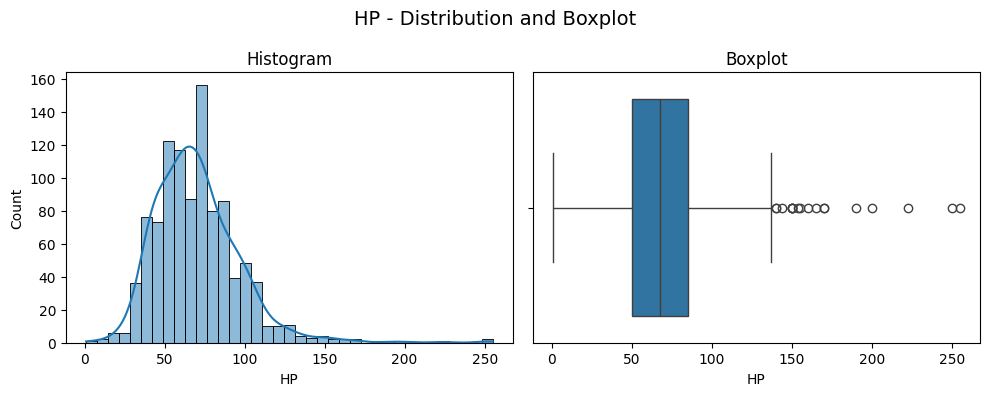

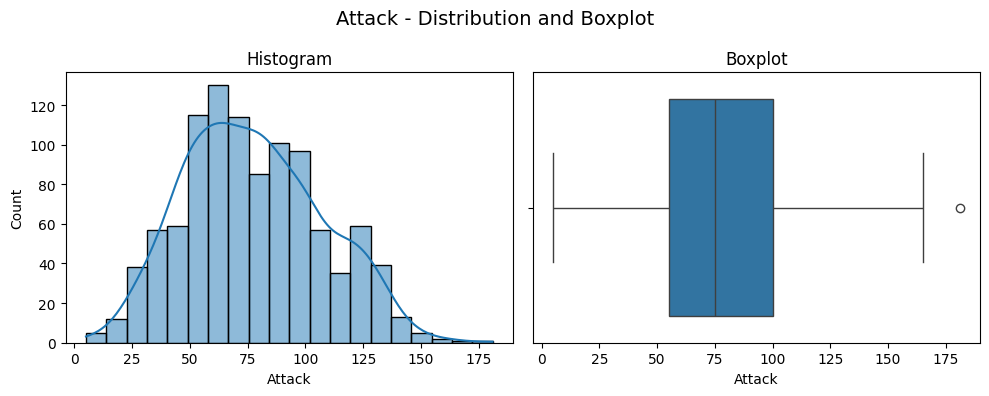

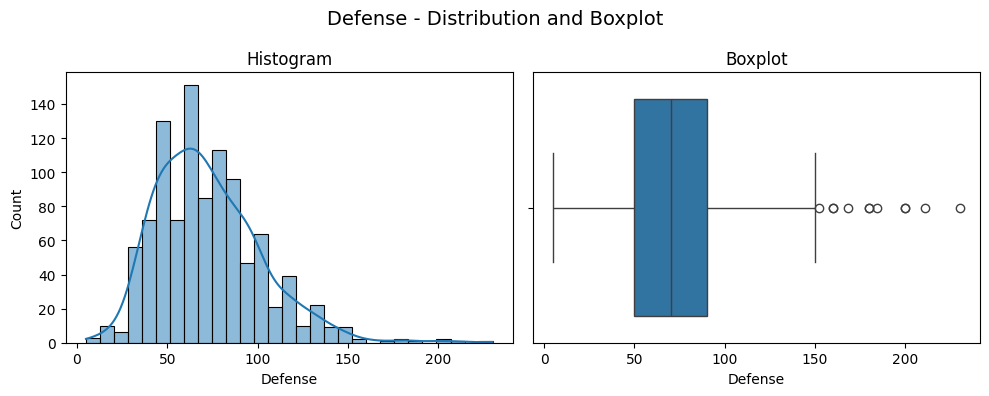

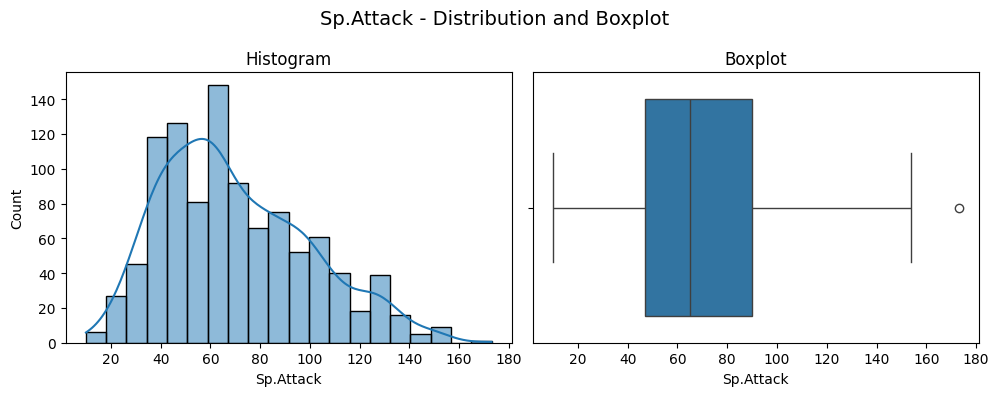

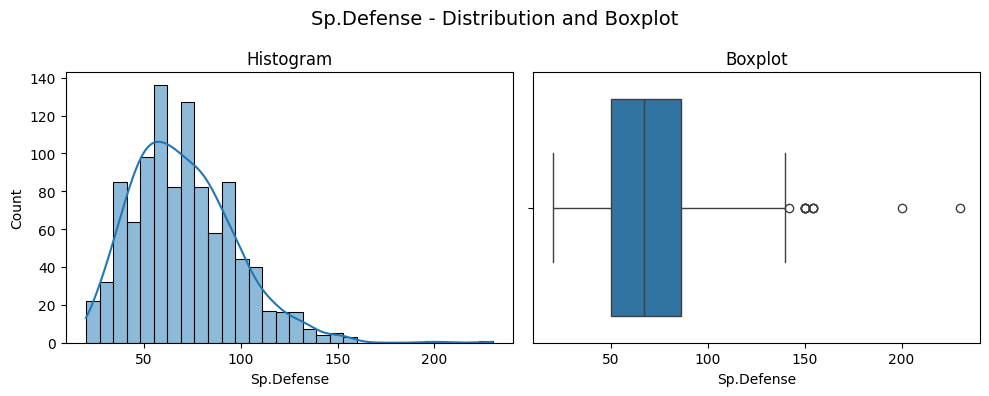

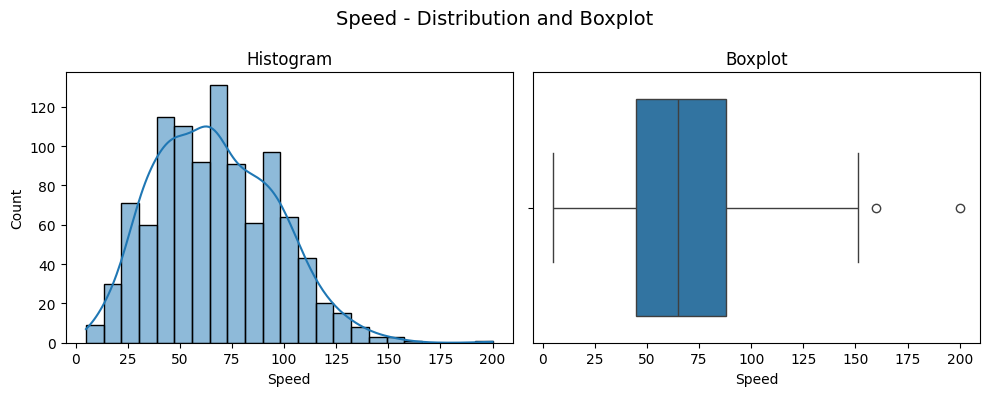

In [16]:
#histograms and boxplots to visualize outliers
for col in df_cont.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{col} - Distribution and Boxplot', fontsize=14)

    # Histogram
    sns.histplot(df_cont[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df_cont[col], ax=axes[1])
    axes[1].set_title('Boxplot')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Handling Data Quality Issues (Cleaning)

Apply appropriate methods to handle missing values (e.g., drop, impute, flag).
Resolve duplicates (drop or merge).
Fix inconsistencies (standardize formats, unify categories).
Handle outliers (remove, cap, or explain decision to keep).

The missing values are only in the 'Type 2' column, which makes sense as not all Pokemon have a second typing, and removing the column could affect the ability to see certain correlations, or skew the data for typings. There are two entries with the same name; however, these are two different Pokemon, so their names will be changed for clarity. There are no apparent inconsistencies. 'HP' and 'Defense' have a lot of outliers; however, this could be helpful in seeing correlations with certain types, so the outliers will be kept.

### Resolve duplicates

In [24]:
#Clarify the duplicate Nidoran entries
dupepokedf = pokedf.copy()
dupepokedf.loc[28, 'Name'] = "NidoranFemale"
dupepokedf.loc[31, 'Name'] = "NidoranMale"

#This is because Pokemon did not have gender indications in the first Pokemon game, so to distinguish the Nidoran genders,
#they are given the Mars and Venus symbols, but it was translated to a question mark, leading to the two Nidoran? entries with different stats.

In [25]:
print(dupepokedf['Name'].value_counts())

Name
Pecharunt       1
Walking Wake    1
Miraidon        1
Koraidon        1
Iron Valiant    1
               ..
Charizard       1
Charmeleon      1
Charmander      1
Venusaur        1
Ivysaur         1
Name: count, Length: 1025, dtype: int64


# Feature Encoding & Scaling (Preprocessing)

### Categorical Data: Use label encoding or one-hot encoding (justify your choice).
Label encoding was used on the type columns so that numeric values could be given to each type which also quickly tells us which typings are most and least common while one-hot encoding would give us a lot more columns and likely make the data less readable.

In [26]:
labelpokedf = dupepokedf.copy()
labelpokedf

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Electric,Dragon,125,73,91,137,89,75
1021,1022,Iron Boulder,Rock,Psychic,90,120,80,68,108,124
1022,1023,Iron Crown,Steel,Psychic,90,72,100,122,108,98
1023,1024,Terapagos,Normal,NaN,90,65,85,65,85,60


In [27]:
from sklearn.preprocessing import LabelEncoder

#Label-encoding is used on sex, fbs, and exang so that they are somewhat consistent and so that the dataset is now all numbers
label_encoder = LabelEncoder()
labelpokedf['Type 1'] = label_encoder.fit_transform(labelpokedf['Type 1']) #1 goes to M and 0 goes to F
labelpokedf['Type 2'] = label_encoder.fit_transform(labelpokedf['Type 2']) #1 goes to T and 0 goes to F

#I use print for these so that both are displayed as without using print, only heart5_df would be displayed. This is done for the other applications as well.
print(pokedf[['Type 1', 'Type 2']])
print(labelpokedf[['Type 1', 'Type 2']])

        Type 1   Type 2
0        Grass   Poison
1        Grass   Poison
2        Grass   Poison
3         Fire      NaN
4         Fire      NaN
...        ...      ...
1020  Electric   Dragon
1021      Rock  Psychic
1022     Steel  Psychic
1023    Normal      NaN
1024    Poison    Ghost

[1025 rows x 2 columns]
      Type 1  Type 2
0          9      13
1          9      13
2          9      13
3          6      18
4          6      18
...      ...     ...
1020       3       2
1021      15      14
1022      16      14
1023      12      18
1024      13       8

[1025 rows x 2 columns]


### Continuous Data: Normalize (min-max scaling) or standardize (z-score scaling) (justify your choice).
I used z-score scaling because some Pokemon can have very high stats compared to others and most of the stats have some outliers, which can be reduced by the z-score standardization.

In [29]:
stdpokedf = dupepokedf.copy()

In [30]:
from scipy.stats import zscore

#All stats are used for the z-score standardization, as they are all on the same scale and range from 1 to 255.
stdpokedf['HP'] = zscore(stdpokedf['HP'])
stdpokedf['Attack'] = zscore(stdpokedf['Attack'])
stdpokedf['Defense'] = zscore(stdpokedf['Defense'])
stdpokedf['Sp.Attack'] = zscore(stdpokedf['Sp.Attack'])
stdpokedf['Sp.Defense'] = zscore(stdpokedf['Sp.Defense'])
stdpokedf['Speed'] = zscore(stdpokedf['Speed'])

#Display before and after comparison
print(dupepokedf[['HP', 'Attack', 'Defense', 'Sp.Attack','Sp.Defense','Speed']])
print(stdpokedf[['HP', 'Attack', 'Defense', 'Sp.Attack','Sp.Defense','Speed']])

       HP  Attack  Defense  Sp.Attack  Sp.Defense  Speed
0      45      49       49         65          65     45
1      60      62       63         80          80     60
2      80      82       83        100         100     80
3      39      52       43         60          50     65
4      58      64       58         80          65     80
...   ...     ...      ...        ...         ...    ...
1020  125      73       91        137          89     75
1021   90     120       80         68         108    124
1022   90      72      100        122         108     98
1023   90      65       85         65          85     60
1024   88      88      160         88          88     88

[1025 rows x 6 columns]
            HP    Attack   Defense  Sp.Attack  Sp.Defense     Speed
0    -0.946139 -0.958141 -0.803046  -0.171400   -0.195515 -0.772957
1    -0.382612 -0.521431 -0.324785   0.334606    0.367837 -0.250367
2     0.368758  0.150432  0.358446   1.009281    1.118973  0.446419
3    -1.171550 -0.8

# Documentation (Summary)

Describe what issues you found. Explain decisions made and methods used. Note trade-offs or assumptions.

Not many issues were found except for two entries seemingly being for the same Pokemon due to the symbols that differentiate them being turned into question marks, the entries' names were changed to their correct versions. One possible "issue" is that the number column is somewhat redundant because the index numbers match but are one less, so it may be a good idea to just omit the number column, and possibly even omit the name column as the main focus of the data are the types and the stats of the Pokemon. The missing values in the 'Type 2' column are intentional though and, with the label encoding, the missing value is given a numeric value to represent it. There were outliers in the data, namely in 'HP' and 'Defense', which are easily seen in the visual representations of the data in the boxplots. The label encoding was used on the types as they are categorical data, and we can still identify what the types are if we look at the values they were assigned; the trade-off being that without knowing the assignments, we do not know what the type is. Z-score standardization was used on each of the stats so that we could see how a Pokemon's particular stat compared with the mean of that stat which could be useful for determining if certain Pokemon types lean below or above the means of specific stat values and if a Pokemon's typing could be predicted based on its stats or even just a couple of its stats.